# Project 30: Sentiment of Technical Debt Dataset

In [6]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10,5]

*1. We want to comprehend each categories in terms of wording they do contain. For this purpose, group
comments pertaining to the same category in the same document, perform appropriate filtering and
lemmatization, then plot WordCloud representation of the associated file. Draw a histogram of the
twenty frequent words in each category.*

In [7]:
# Read data and create lists of comments for each class
df = pd.read_csv("technical_debt_dataset/technical_debt_dataset.csv")

defect_list = df[df["classification"]=="DEFECT"]["commenttext"].values.tolist()
design_list = df[df["classification"]=="DESIGN"]["commenttext"].values.tolist()
test_list = df[df["classification"]=="TEST"]["commenttext"].values.tolist()
documentation_list = df[df["classification"]=="DOCUMENTATION"]["commenttext"].values.tolist()
implementation_list = df[df["classification"]=="IMPLEMENTATION"]["commenttext"].values.tolist()
technical_dept_list = defect_list + design_list + test_list + documentation_list + implementation_list
other_list = df[df["classification"]=="WITHOUT_CLASSIFICATION"]["commenttext"].values.tolist()
all_list = technical_dept_list + other_list

# Preprocessing

# Remove comment tags
for list in [defect_list, design_list, test_list, documentation_list, implementation_list, other_list]:
    for i in range(len(list)):
        list[i] = " ".join(list[i].replace("//", "").replace("/*", "").replace("*/", "").replace("*", "").strip().split())

# print("Defects: ", defect_list[:5])
# print("Design: ", design_list[:5])
# print("Test: ", test_list[:5])
# print("Documentation: ", documentation_list[:5])
# print("Implementation: ", implementation_list[:5])
# print("Other: ", other_list[:5])

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

#nltk.download('stopwords')

# Stoplist

filtered_tokens = ["``", "''"]

for char in punctuation:
    filtered_tokens.append(char)

stopwords = stopwords.words('english')

stoplist = filtered_tokens + stopwords

# Category lists
defect_words = []
design_words = []
test_words = []
documentation_words =  []
implementation_words =  []
other_words =  []

# Tokenise, filter and lemmatise words

def comment_to_words(list, category_words):
    for comment in list:
        words = nltk.word_tokenize(comment)
        for word in words:
            if word not in stoplist:
                word = WordNetLemmatizer().lemmatize(word).lower()
                category_words.append(word)

comment_to_words(defect_list, defect_words)
comment_to_words(design_list, design_words)
comment_to_words(test_list, test_words)
comment_to_words(documentation_list, documentation_words)
comment_to_words(implementation_list, implementation_words)
comment_to_words(other_list, other_words)

technical_dept_words = defect_words + design_words + test_words + documentation_words + implementation_words

# print("Defect words: " + str(defect_words))
# print("Design words: " + str(design_words))
# print("Test words: " + str(test_words))
# print("Documentation words: " + str(documentation_words))
# print("Implementation words: " + str(implementation_words))
# print("Technical debt words: " + str(technical_dept_words))
# print("Other words: " + str(other_words))

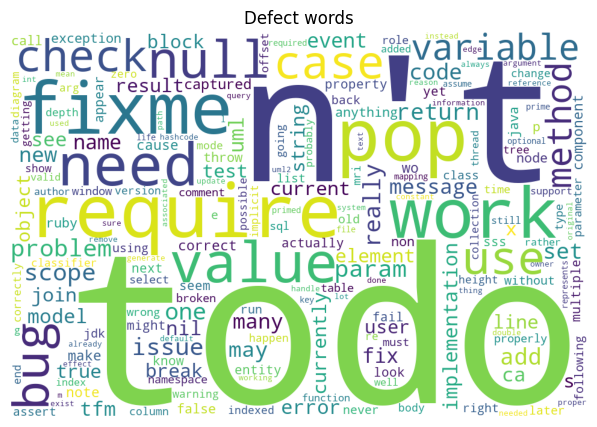

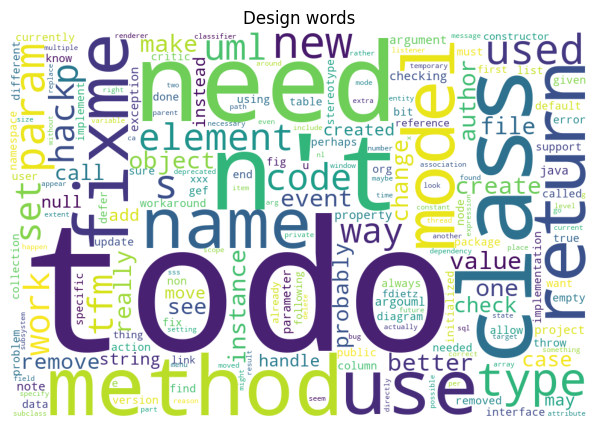

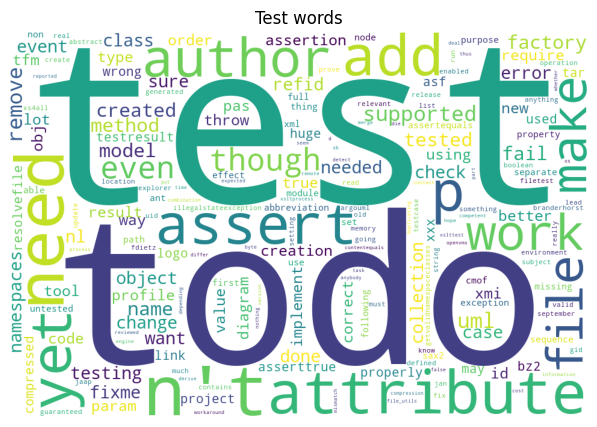

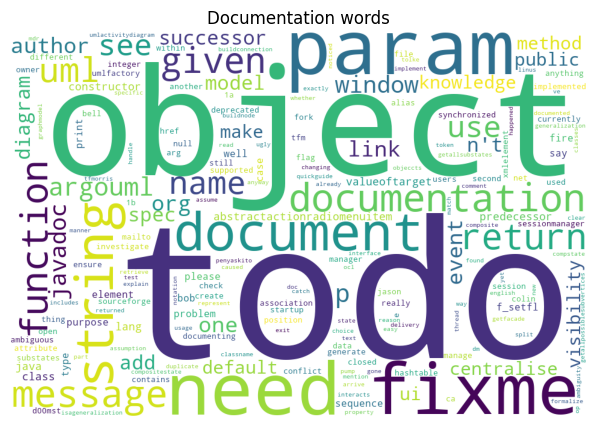

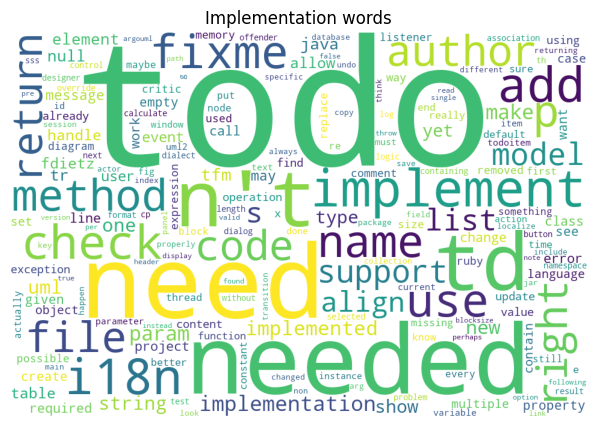

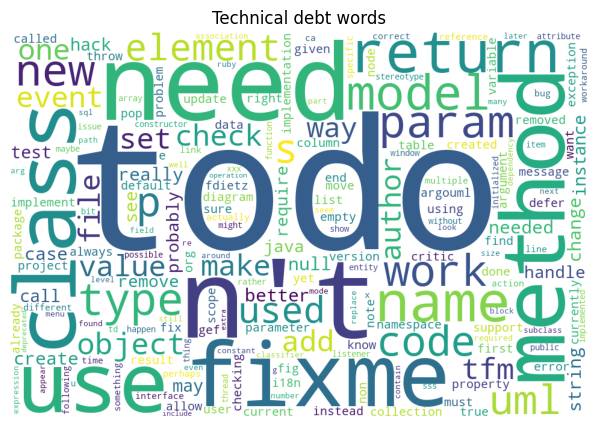

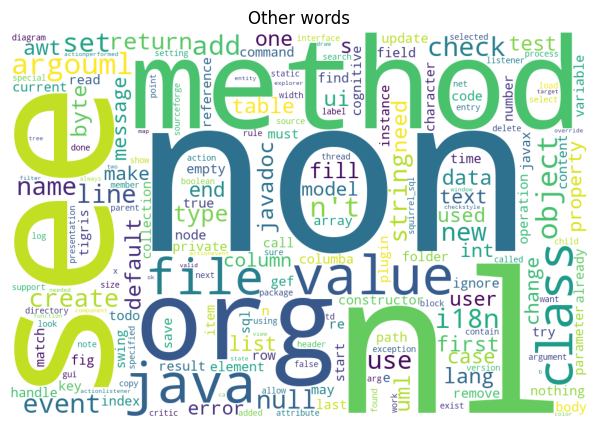

In [9]:
from wordcloud import WordCloud

def wordcloud(title, words):
    wordcloud = WordCloud(width=960, height=640, background_color="white",collocations=False, relative_scaling=0.5).generate(words)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

wordcloud("Defect words", " ".join(defect_words))
wordcloud("Design words", " ".join(design_words))
wordcloud("Test words", " ".join(test_words))
wordcloud("Documentation words", " ".join(documentation_words))
wordcloud("Implementation words", " ".join(implementation_words))
wordcloud("Technical debt words", " ".join(technical_dept_words))
wordcloud("Other words", " ".join(other_words))

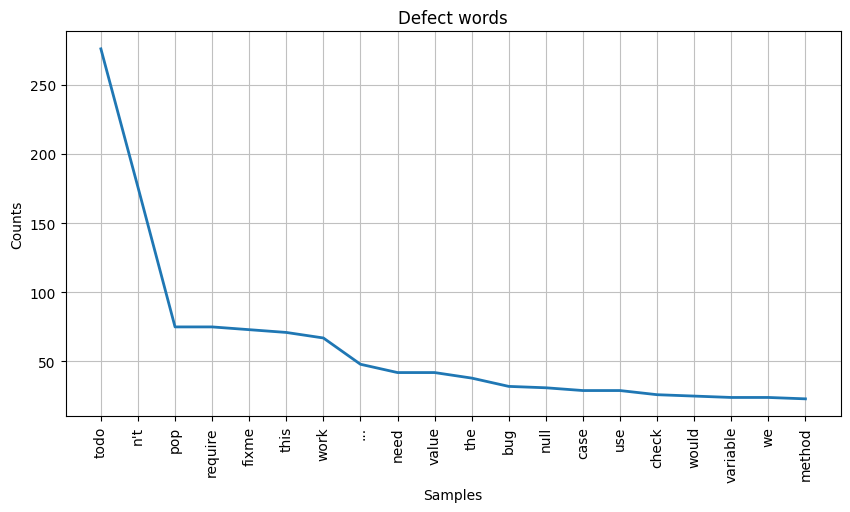

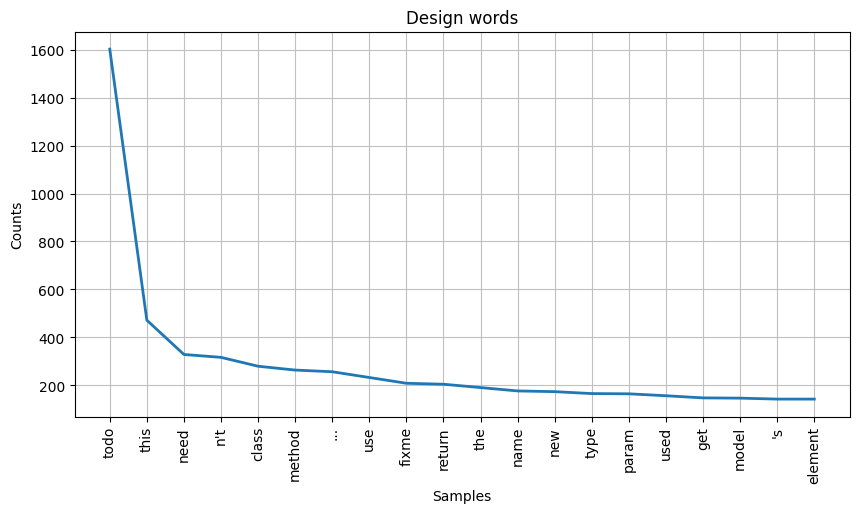

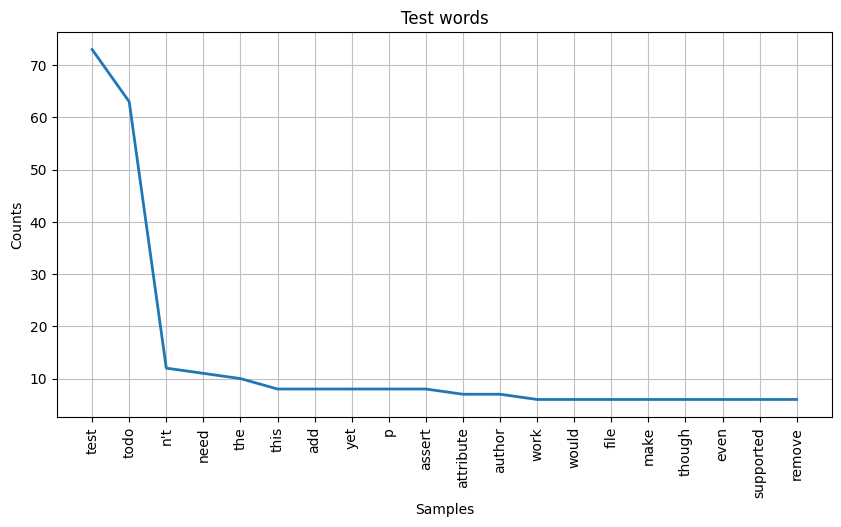

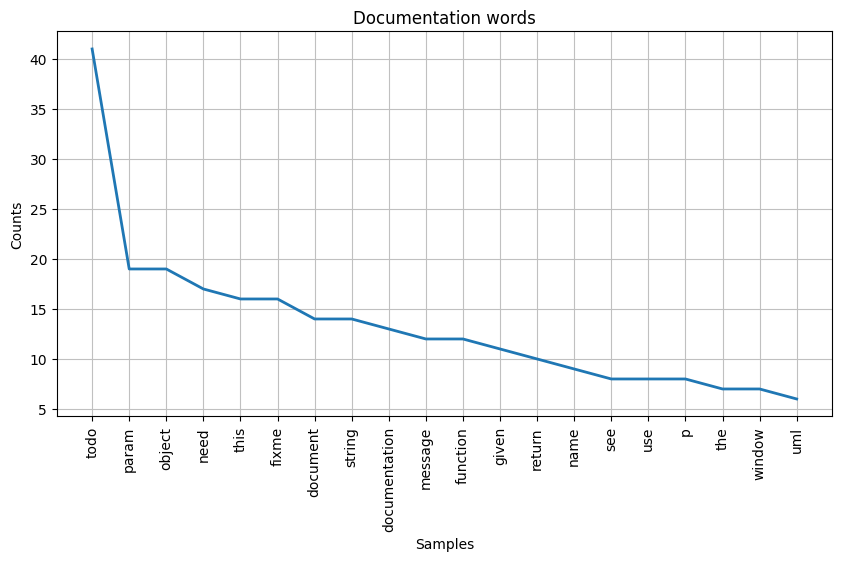

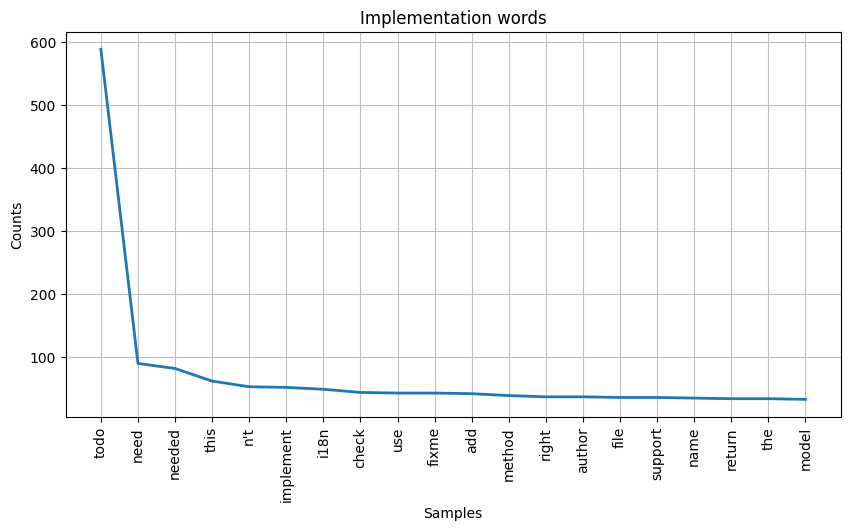

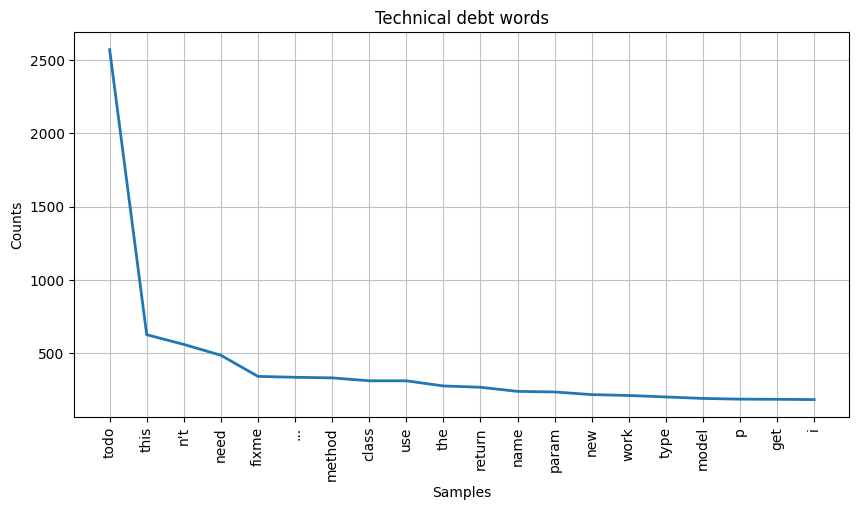

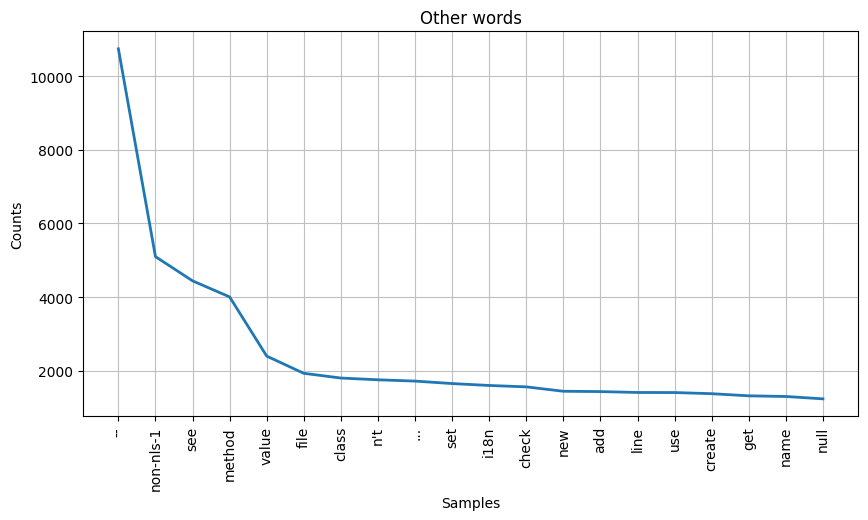

In [10]:
from nltk.probability import FreqDist

# Frequency distributions
plt.figure()
defect_fd = FreqDist(defect_words)
defect_fd.plot(20, title="Defect words", show=False)
plt.figure()
design_fd = FreqDist(design_words)
design_fd.plot(20, title="Design words", show=False)
plt.figure()
test_fd = FreqDist(test_words)
test_fd.plot(20, title="Test words", show=False)
plt.figure()
documentation_fd = FreqDist(documentation_words)
documentation_fd.plot(20, title="Documentation words", show=False)
plt.figure()
implementation_fd = FreqDist(implementation_words)
implementation_fd.plot(20, title="Implementation words", show=False)
plt.figure()
technical_dept_fd = FreqDist(technical_dept_words)
technical_dept_fd.plot(20, title="Technical debt words", show=False)
plt.figure()
other_fd = FreqDist(other_words)
other_fd.plot(20, title="Other words", show=False)
plt.show()

*2. We want to find out if one can characterize each category in terms of unique words it contain. For this
purpose, after appropriate preprocessing and lemmatization, construct a vocabulary S of the common
words that appear in all categories, and vocabulary S1, S2, S3, S4, S5, S6 of wording that were uniquely
present in a given category not in any other categories. Discuss the cardinality of S, S1, S2, S3, S4, S5
and S6. Draw histogram showing the frequency of the unique wording in each category. Store S, S1, S2,
S3, S4, S5 and S6 in a separate database, say D1.*

Common words across all categories:  105
Unique defect words:  328
Unique design words:  1773
Unique test words:  58
Unique documentation words:  36
Unique implementation words:  331
Unique technical debt words:  2635
Unique other words:  21702


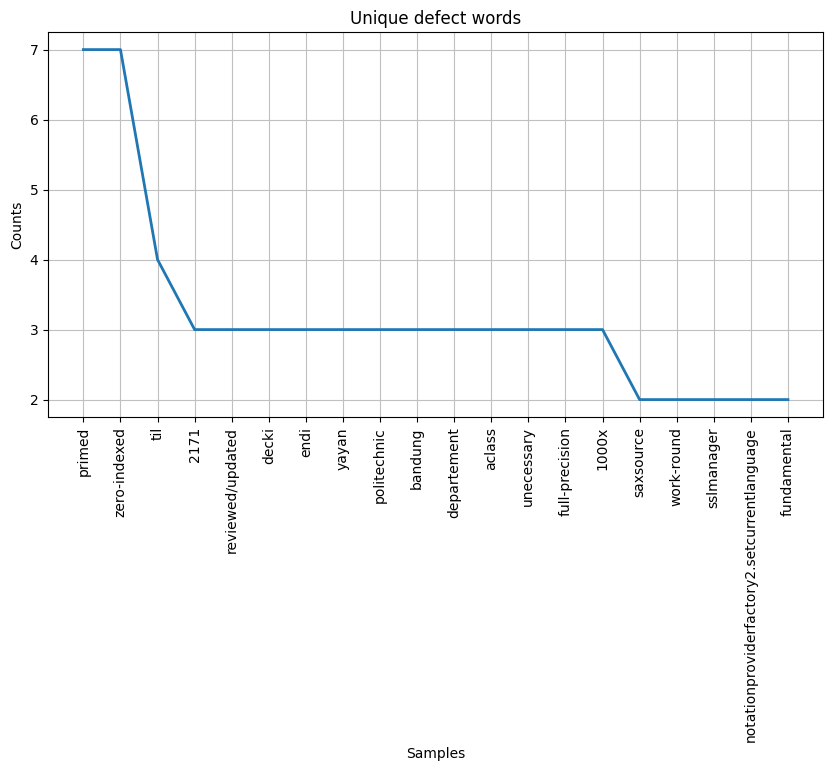

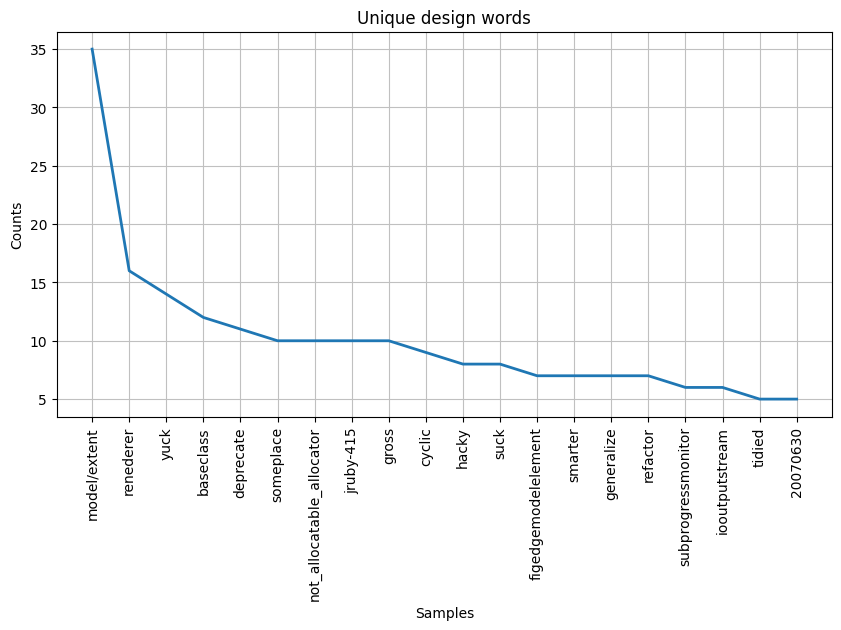

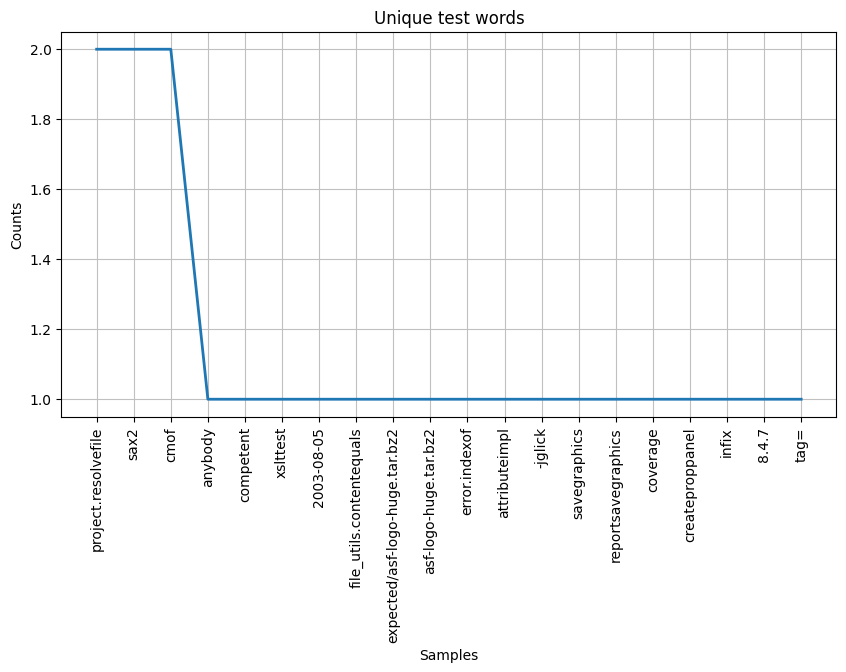

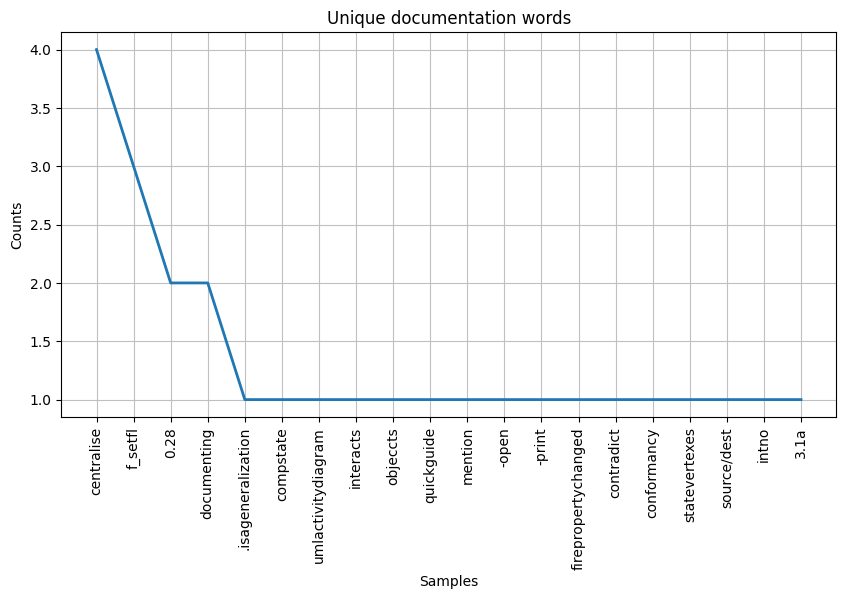

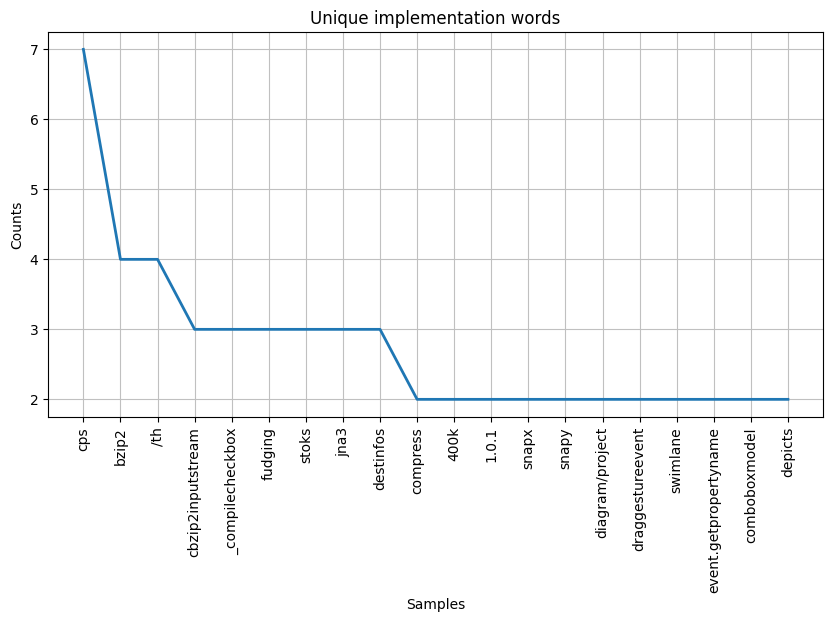

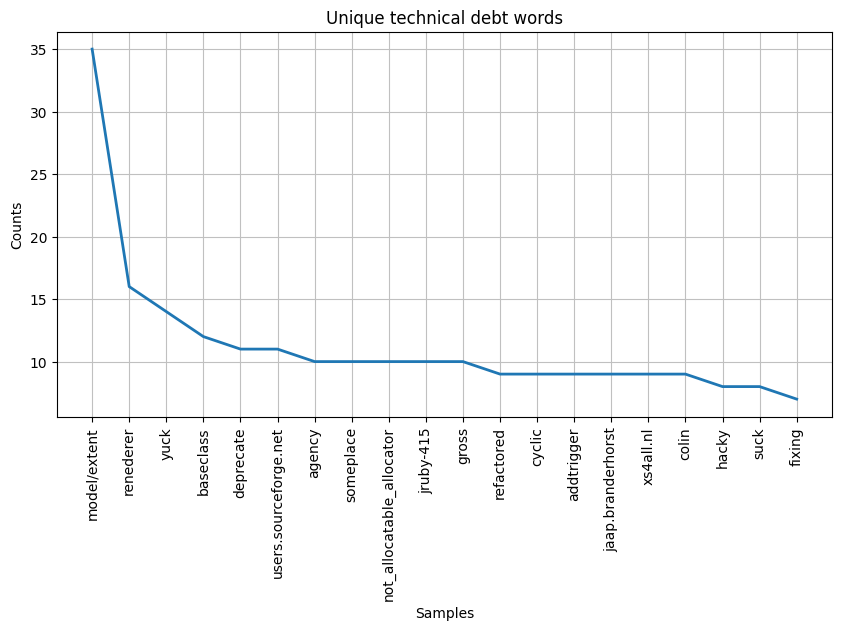

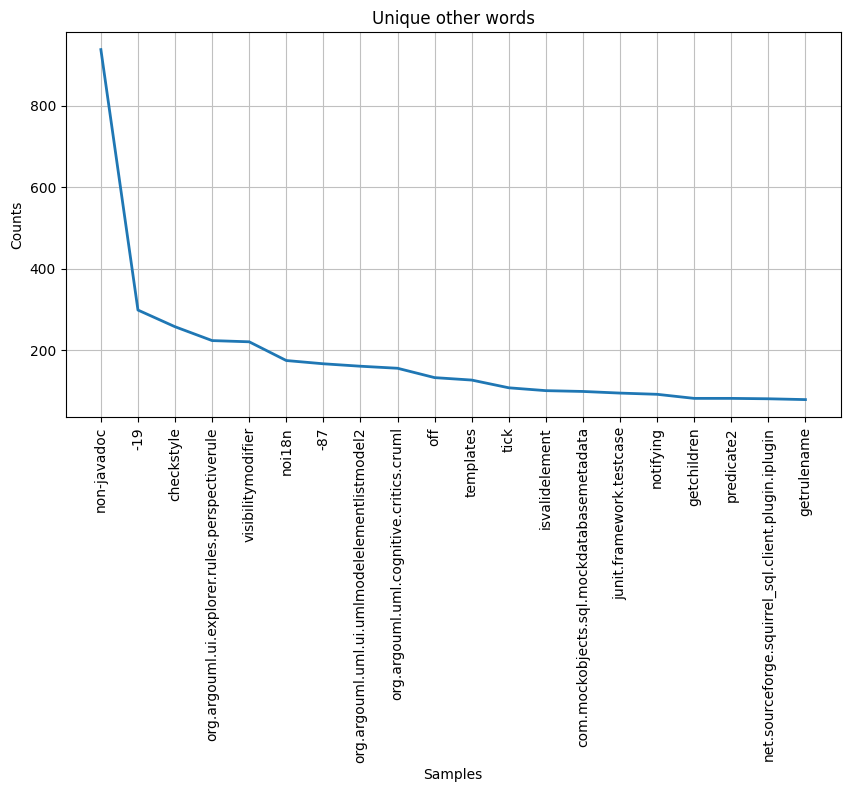

In [11]:
# Convert lists to sets to remove duplicate words
defect_words_set = set(defect_words)
design_words_set = set(design_words)
test_words_set = set(test_words)
documentation_words_set = set(documentation_words)
implementation_words_set = set(implementation_words)
technical_dept_words_set = set(technical_dept_words)
other_words_set = set(other_words)

# Find the words that are common to all categories
common_words = [word for word in defect_words_set if word in design_words_set and word in test_words_set and word in documentation_words_set and word in implementation_words_set and word in other_words_set]
print("Common words across all categories: ", len(common_words))

# Find the words that are unique to each category
defect_words_unique = [word for word in defect_words_set if word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique defect words: ", len(defect_words_unique))

design_words_unique = [word for word in design_words_set if word not in defect_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique design words: ", len(design_words_unique))

test_words_unique = [word for word in test_words_set if word not in defect_words_set and word not in design_words_set and word not in documentation_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique test words: ", len(test_words_unique))

documentation_words_unique = [word for word in documentation_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in implementation_words_set and word not in other_words_set]
print("Unique documentation words: ", len(documentation_words_unique))

implementation_words_unique = [word for word in implementation_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in other_words_set]
print("Unique implementation words: ", len(implementation_words_unique))

technical_dept_words_unique = [word for word in technical_dept_words_set if word not in other_words_set]
print("Unique technical debt words: ", len(technical_dept_words_unique))

other_words_unique = [word for word in other_words_set if word not in defect_words_set and word not in design_words_set and word not in test_words_set and word not in documentation_words_set and word not in implementation_words_set]
print("Unique other words: ", len(other_words_unique))

# Frequency distributions of unique words
plt.figure()
defect_fd_unique = [pair for pair in defect_fd.items() if pair[0] in defect_words_unique]
defect_fd_unique = dict(defect_fd_unique)
defect_fd_unique = FreqDist(defect_fd_unique)
defect_fd_unique.plot(20, title="Unique defect words", show=False)
plt.figure()
design_fd_unique = [pair for pair in design_fd.items() if pair[0] in design_words_unique]
design_fd_unique = dict(design_fd_unique)
design_fd_unique = FreqDist(design_fd_unique)
design_fd_unique.plot(20, title="Unique design words", show=False)
plt.figure()
test_fd_unique = [pair for pair in test_fd.items() if pair[0] in test_words_unique]
test_fd_unique = dict(test_fd_unique)
test_fd_unique = FreqDist(test_fd_unique)
test_fd_unique.plot(20, title="Unique test words", show=False)
plt.figure()
documentation_fd_unique = [pair for pair in documentation_fd.items() if pair[0] in documentation_words_unique]
documentation_fd_unique = dict(documentation_fd_unique)
documentation_fd_unique = FreqDist(documentation_fd_unique)
documentation_fd_unique.plot(20, title="Unique documentation words", show=False)
plt.figure()
implementation_fd_unique = [pair for pair in implementation_fd.items() if pair[0] in implementation_words_unique]
implementation_fd_unique = dict(implementation_fd_unique)
implementation_fd_unique = FreqDist(implementation_fd_unique)
implementation_fd_unique.plot(20, title="Unique implementation words", show=False)
plt.figure()
technical_dept_fd_unique = [pair for pair in technical_dept_fd.items() if pair[0] in technical_dept_words_unique]
technical_dept_fd_unique = dict(technical_dept_fd_unique)
technical_dept_fd_unique = FreqDist(technical_dept_fd_unique)
technical_dept_fd_unique.plot(20, title="Unique technical debt words", show=False)
plt.figure()
other_fd_unique = [pair for pair in other_fd.items() if pair[0] in other_words_unique]
other_fd_unique = dict(other_fd_unique)
other_fd_unique = FreqDist(other_fd_unique)
other_fd_unique.plot(20, title="Unique other words", show=False)
plt.show()

*3. Use LDA with topics equal 6 and 20 words per topic. We would like to find out whether output of the
LDA matches the categorization provided by word frequency or unique wording. For this purpose, for
each topic, try to match the words of the topics to the twenty most frequent words and use a simple
string matching (i.e., Fuzzy-string matching) to report the percentage of string matching between two
sets. We shall proceed by elimination; namely, for each category characterized by its twenty most
frequent words, we compute the fuzzy-string matching with every topic and the assignment is made to
the topic that achieves the highest score. Discuss on the usefulness of this approach.*

In [12]:
# tän ajamisessa menee pari minuuttia

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a bag-of-words matrix as input to LDA and fit the model
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_list)
lda_6 = LatentDirichletAllocation(n_components=6, learning_method='batch', random_state=0)
# lda_2 = LatentDirichletAllocation(n_components=2, learning_method='batch', random_state=0)
X_topics_6 = lda_6.fit_transform(X)
# X_topics_2 = lda_2.fit_transform(X)

In [13]:
from fuzzywuzzy import fuzz

topic_1_words = []
topic_2_words = []
topic_3_words = []
topic_4_words = []
topic_5_words = []
topic_6_words = []

# Display the topics
print("""
Topics:
""")
n_top_words = 20
feature_names = np.array(vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda_6.components_):
      print("Topic %d:" % (topic_idx + 1), end=" ")
      if topic_idx == 0:
            topic_1_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 1:
            topic_2_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 2:
            topic_3_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 3:
            topic_4_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 4:
            topic_5_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
      elif topic_idx == 5:
            topic_6_words.extend([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
            print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
    

# print(
# """
# ---------
# 2 topics:
# ---------
# """
# )
# n_top_words = 20
# feature_names = np.array(vectorizer.get_feature_names_out())
# for topic_idx, topic in enumerate(lda_2.components_):
#       print("Topic %d:" % (topic_idx + 1))
#       if topic_idx == 0:
#             print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))
#       elif topic_idx == 1:
#             print(" ".join(feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]))


defect_20 = [pair[0] for pair in defect_fd.most_common(20)]
design_20 = [pair[0] for pair in design_fd.most_common(20)]
test_20 = [pair[0] for pair in test_fd.most_common(20)]
documentation_20 = [pair[0] for pair in documentation_fd.most_common(20)]
implementation_20 = [pair[0] for pair in implementation_fd.most_common(20)]
other_20 = [pair[0] for pair in other_fd.most_common(20)]

defect_20_unique = [pair[0] for pair in defect_fd_unique.most_common(20)]
design_20_unique = [pair[0] for pair in design_fd_unique.most_common(20)]
test_20_unique = [pair[0] for pair in test_fd_unique.most_common(20)]
documentation_20_unique = [pair[0] for pair in documentation_fd_unique.most_common(20)]
implementation_20_unique = [pair[0] for pair in implementation_fd_unique.most_common(20)]
other_20_unique = [pair[0] for pair in other_fd_unique.most_common(20)]

# Find the best match for each topic and category using fuzzywuzzy
print("""
Matching topics to categories:
""")

for i, topic in enumerate([topic_1_words, topic_2_words, topic_3_words, topic_4_words, topic_5_words, topic_6_words]):
      for j, words in enumerate([defect_20, design_20, test_20, documentation_20, implementation_20, other_20]):
            best_match = -1
            best_score = -1
            score = fuzz.token_sort_ratio(" ".join(topic), " ".join(words))
            if score > best_score:
                  best_score = score
                  best_match = j
      print("Topic", i+1, "best matches category", best_match+1, "with a score of", best_score)


Topics:

Topic 1: org argouml java object value ui uml lang byte method cognitive columba string 33 19 critics rules model explorer util
Topic 2: event i18n file java awt data set use create user read sql check body method properties column change error settings
Topic 3: default value line type gef ignore int return string tigris text set fig list command use td size org key
Topic 4: non nls javadoc folder javax swing table net message sourceforge squirrel_sql checkstyle visibilitymodifier instance variables new add operations client select
Topic 5: todo add new need don class create check case use constructor path just make remove return property element list node
Topic 6: method class end line todo private methods null code return i18n array members static plugin implementation result public needed graph

Matching topics to categories:

Topic 1 best matches category 6 with a score of 37
Topic 2 best matches category 6 with a score of 52
Topic 3 best matches category 6 with a score o

/Users/mirko/Library/Python/3.9/lib/python/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


*4. Repeat the reasoning carried out in 3) when one assumes that each category is represented by its set of unique wording S1, S2, …, S6.*

In [14]:
print("""
Matching topics to categories with unique words:
""")

for i, topic in enumerate([topic_1_words, topic_2_words, topic_3_words, topic_4_words, topic_5_words, topic_6_words]):
      for j, words in enumerate([defect_20_unique, design_20_unique, test_20_unique, documentation_20_unique, implementation_20_unique, other_20_unique]):
            best_match = 0
            best_score = 0
            score = fuzz.token_sort_ratio(" ".join(topic), " ".join(words))
            if score > best_score:
                  best_score = score
                  best_match = j
      print("Topic", i+1, "best matches category", best_match+1, "with a score of", best_score)


Matching topics to categories with unique words:

Topic 1 best matches category 6 with a score of 4
Topic 2 best matches category 6 with a score of 5
Topic 3 best matches category 6 with a score of 2
Topic 4 best matches category 6 with a score of 26
Topic 5 best matches category 6 with a score of 6
Topic 6 best matches category 6 with a score of 3


### EXTRA: categorization based on tf-idf and random forest

Categorical classification:

In [15]:
print(len(defect_list), len(design_list), len(test_list), len(documentation_list), len(implementation_list), len(other_list))

# Choose every nth comment for each category to get a more balanced dataset
other_list = other_list[::100]
design_list = design_list[::5]
print(len(defect_list), len(design_list), len(test_list), len(documentation_list), len(implementation_list), len(other_list))

all_list = defect_list + design_list + test_list + documentation_list + implementation_list + other_list

472 2703 85 54 757 58204
472 541 85 54 757 583


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = all_list
y_defect = ["DEFECT"] * len(defect_list)
y_design = ["DESIGN"] * len(design_list)
y_test = ["TEST"] * len(test_list)
y_documentation = ["DOCUMENTATION"] * len(documentation_list)
y_implementation = ["IMPLEMENTATION"] * len(implementation_list)
y_other = ["WITHOUT_CLASSIFICATION"] * len(other_list)
y = y_defect + y_design + y_test + y_documentation + y_implementation + y_other

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

print("Accuracy: ", rf.score(X_test, y_test))

Accuracy:  0.6833667334669339


In [17]:
# Test some new comments
comment1 = "This doesn't work the way it should" # Defect
comment2 = "Might switch to a different library for this" # Design
comment3 = "TODO: Need to add more tests for this" # Test
comment4 = "TODO add documentation for the function" # Documentation
comment5 = "TODO: Add support for multithreading and parallel processing" # Implementation
comment6 = "The sky is quite blue today" # Without classification

comment_vectors = vectorizer.transform([comment1, comment2, comment3, comment4, comment5, comment6])

print("Comment 1 prediction: ", rf.predict(comment_vectors[0]))
print("Comment 2 prediction: ", rf.predict(comment_vectors[1]))
print("Comment 3 prediction: ", rf.predict(comment_vectors[2]))
print("Comment 4 prediction: ", rf.predict(comment_vectors[3]))
print("Comment 5 prediction: ", rf.predict(comment_vectors[4]))
print("Comment 6 prediction: ", rf.predict(comment_vectors[5]))

Comment 1 prediction:  ['DEFECT']
Comment 2 prediction:  ['WITHOUT_CLASSIFICATION']
Comment 3 prediction:  ['TEST']
Comment 4 prediction:  ['IMPLEMENTATION']
Comment 5 prediction:  ['IMPLEMENTATION']
Comment 6 prediction:  ['WITHOUT_CLASSIFICATION']


Binary classification (is the comment technical debt related or not?):

In [18]:
y_defect = [1] * len(defect_list)
y_design = [1] * len(design_list)
y_test = [1] * len(test_list)
y_documentation = [1] * len(documentation_list)
y_implementation = [1] * len(implementation_list)
y_other = [0] * len(other_list)
y = y_defect + y_design + y_test + y_documentation + y_implementation + y_other

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_binary = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rf_binary.fit(X_train, y_train)

print("Binary accuracy: ", rf_binary.score(X_test, y_test))

Binary accuracy:  0.9418837675350702


In [19]:
comment1 = "This doesn't work the way it should" # 1 (Technical debt)
comment2 = "Might switch to a different library for this" # 1
comment3 = "TODO: Add support for multithreading and parallel processing" # 1
comment4 = "TODO add documentation for the function" # 1
comment5 = "The sky is quite blue today" # 0 (Without classification)
comment6 = "Finds the local optima of the input" # 0
comment7 = "Calculates the sum of the input" # 0
comment8 = "display the spectrogram of an audio signal" # 0

comment_vectors = vectorizer.transform([comment1, comment2, comment3, comment4, comment5, comment6, comment7, comment8])

print("Comment 1 prediction: ", rf_binary.predict(comment_vectors)[0])
print("Comment 2 prediction: ", rf_binary.predict(comment_vectors)[1])
print("Comment 3 prediction: ", rf_binary.predict(comment_vectors)[2])
print("Comment 4 prediction: ", rf_binary.predict(comment_vectors)[3])
print("Comment 5 prediction: ", rf_binary.predict(comment_vectors)[4])
print("Comment 6 prediction: ", rf_binary.predict(comment_vectors)[5])
print("Comment 7 prediction: ", rf_binary.predict(comment_vectors)[6])
print("Comment 8 prediction: ", rf_binary.predict(comment_vectors)[7])

Comment 1 prediction:  1
Comment 2 prediction:  0
Comment 3 prediction:  1
Comment 4 prediction:  1
Comment 5 prediction:  0
Comment 6 prediction:  0
Comment 7 prediction:  0
Comment 8 prediction:  0


*5. We want to discriminate the categories using information about Empath Client. For this purpose,
perform Empath Client on the document associated to each category and generate the new
categorization of each class. Suggest how you can perform to identify classes that present ambiguity
and those that offer good discrimination power.*

In [20]:
from empath import Empath
lexicon = Empath()

In [21]:
empath_found_categories = []
empath_analysed_comments = []

# Tässä menee yli 3 min, kun käy kaikki kommentit läpi

for comment in all_list:
    # Analyse the comment
    analysis = lexicon.analyze(comment)
    # Save the comment and its categories
    comment_data = []
    comment_data.append(comment)
    comment_categories = []
    for category in analysis:
        # Add found categories to the category list and categories of this comment
        if analysis[category] > 0.0:
            empath_found_categories.append(category)
            comment_categories.append(category)
    comment_data.append(comment_categories)
    empath_analysed_comments.append(comment_data)

In [22]:
empath_df = pd.DataFrame(empath_analysed_comments)
empath_df.to_csv('empath.csv', index=False)

In [23]:
#for category in empath_found_categories:
    #print(category, end=", ")

social_media, reading, law, hate, envy, negative_emotion, nervousness, social_media, real_estate, business, confusion, urban, tool, emotional, negative_emotion, messaging, competing, driving, ancient, vehicle, farming, car, social_media, computer, business, reading, giving, computer, animal, competing, sleep, home, deception, fabric, rural, musical, government, politeness, anger, friends, attractive, school, college, business, reading, science, work, traveling, beauty, competing, weapon, injury, social_media, computer, business, reading, giving, business, reading, giving, journalism, computer, reading, communication, work, animal, messaging, giving, surprise, disappointment, stealing, real_estate, confusion, rural, appearance, shape_and_size, giving, driving, vehicle, car, messaging, friends, computer, animal, children, business, work, help, money, pride, art, optimism, fear, business, cooking, movement, celebration, violence, love, injury, science, work, traveling, party, negative_emo

*6. Now, we want to analyze the content of the categories in terms of sentiment. Use the SentiStrength
from http://sentistrength.wlv.ac.uk/ to determine the positive, negative and overall (sum of positive
and negative) sentiment score for each source code comment. Provide a database D1, which contains
these information for each source code comment belonging to categories. Determine the average
overall sentiment of each of the six categories S1-S5 and S6 (or Y). Discuss whether the sentiment score
can be used as a relevant attribute to discriminate among the various categories.*

In [24]:
from sentistrength import PySentiStr

# SentiStrength.jar and SentiStrengthData folder absolute path
#sentistrength_path = ""
sentistrength_path = "/Users/mirko/Documents/Kurssit/Natural Language Processing and Text Mining/Project/sentistrength"
senti = PySentiStr()

senti.setSentiStrengthPath(sentistrength_path + '/SentiStrength.jar')
senti.setSentiStrengthLanguageFolderPath(sentistrength_path + '/SentiStrengthData/')

# Sentiment analysis for each category

sentiment_defect = []
sentiment_design = []
sentiment_test = []
sentiment_documentation = []
sentiment_implementation = []
sentiment_other = []

sentiment = senti.getSentiment(defect_list, score='dual')
for n, comment in enumerate(defect_list):
    sentiment_defect.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(design_list, score='dual')
for n, comment in enumerate(design_list):
    sentiment_design.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(test_list, score='dual')
for n, comment in enumerate(test_list):
    sentiment_test.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(documentation_list, score='dual')
for n, comment in enumerate(documentation_list):
    sentiment_documentation.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(implementation_list, score='dual')
for n, comment in enumerate(implementation_list):
    sentiment_implementation.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall

sentiment = senti.getSentiment(other_list, score='dual')
for n, comment in enumerate(other_list):
    sentiment_other.append([comment, sentiment[n][0], sentiment[n][1], sentiment[n][0] + sentiment[n][1]]) # comment, positive, negative, overall


In [25]:
# Calculate the average overall scores
def sentiment_score(sentiment_list):
    dividend = 0
    divisor = len(sentiment_list)
    for comment in sentiment_list:
        dividend = dividend + comment[3]
        divisor = divisor + 1
    defect_score = dividend / divisor
    return defect_score

print("Defect average: " + str(sentiment_score(sentiment_defect)))
print("Design average: " + str(sentiment_score(sentiment_design)))
print("Test average: " + str(sentiment_score(sentiment_test)))
print("Documentation average: " + str(sentiment_score(sentiment_documentation)))
print("Implementation average: " + str(sentiment_score(sentiment_implementation)))
print("Other average: " + str(sentiment_score(sentiment_other)))


Defect average: -0.045550847457627115
Design average: -0.04528650646950092
Test average: 0.047058823529411764
Documentation average: 0.046296296296296294
Implementation average: 0.03368560105680317
Other average: -0.023156089193825044


*7. For each category, discriminate among the comments pertaining to positive sentiment and those
negative sentiment and concatenate all positive comments together and negative comments together
as well. For each category, draw histogram of most frequent wording in each positive and negative
sentiment. Comment whether you can use frequency distribution to discriminate among the
categories.*

In [35]:
positive_defect = []
positive_design = []
positive_test = []
positive_documentation = []
positive_implementation = []
positive_other = []

negative_defect = []
negative_design = []
negative_test = []
negative_documentation = []
negative_implementation = []
negative_other = []

for comment in sentiment_defect:
    if comment[3] > 0: positive_defect.append(comment[0])
    if comment[3] < 0: negative_defect.append(comment[0])

for comment in sentiment_design:
    if comment[3] > 0: positive_design.append(comment[0])
    if comment[3] < 0: negative_design.append(comment[0])

for comment in sentiment_test:
    if comment[3] > 0: positive_test.append(comment[0])
    if comment[3] < 0: negative_test.append(comment[0])

for comment in sentiment_documentation:
    if comment[3] > 0: positive_documentation.append(comment[0])
    if comment[3] < 0: negative_documentation.append(comment[0])

for comment in sentiment_implementation:
    if comment[3] > 0: positive_implementation.append(comment[0])
    if comment[3] < 0: negative_implementation.append(comment[0])

for comment in sentiment_other:
    if comment[3] > 0: positive_other.append(comment[0])
    if comment[3] < 0: negative_other.append(comment[0])

In [44]:
positive_defect_words = []
positive_design_words = []
positive_test_words = []
positive_documentation_words = []
positive_implementation_words = []
positive_other_words = []

negative_defect_words = []
negative_design_words = []
negative_test_words = []
negative_documentation_words = []
negative_implementation_words = []
negative_other_words = []

comment_to_words(positive_defect, positive_defect_words)
comment_to_words(positive_design, positive_design_words)
comment_to_words(positive_test, positive_test_words)
comment_to_words(positive_documentation, positive_documentation_words)
comment_to_words(positive_implementation, positive_implementation_words)
comment_to_words(positive_other, positive_other_words)

comment_to_words(negative_defect, negative_defect_words)
comment_to_words(negative_design, negative_design_words)
comment_to_words(negative_test, negative_test_words)
comment_to_words(negative_documentation, negative_documentation_words)
comment_to_words(negative_implementation, negative_implementation_words)
comment_to_words(negative_other, negative_other_words)

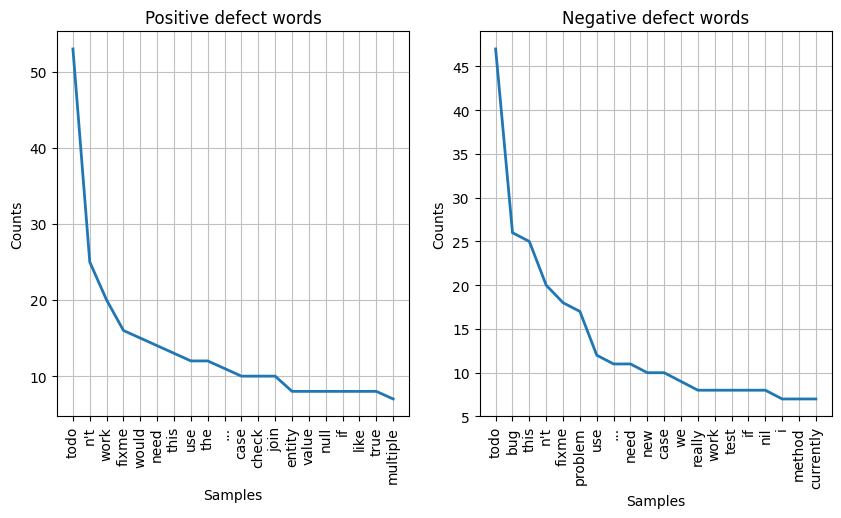

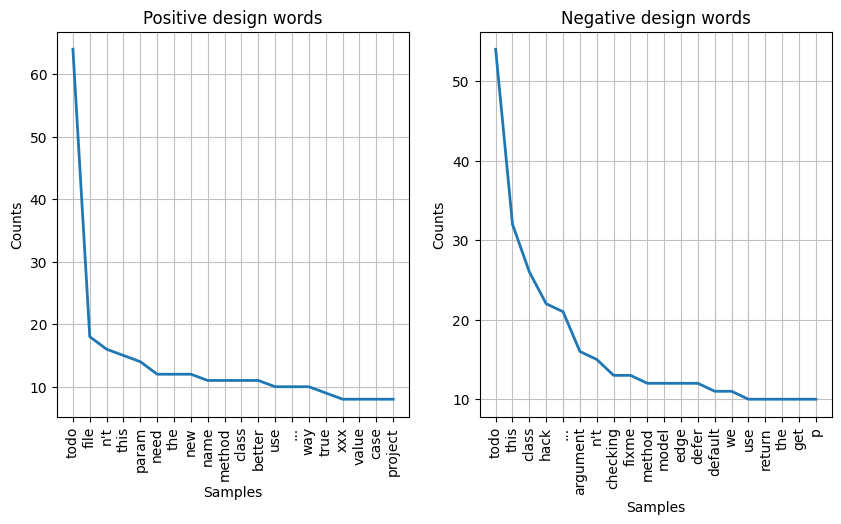

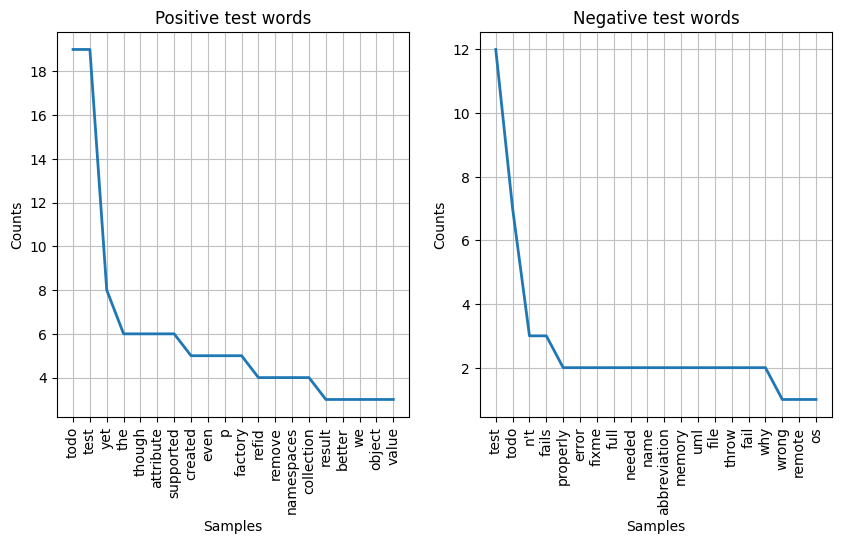

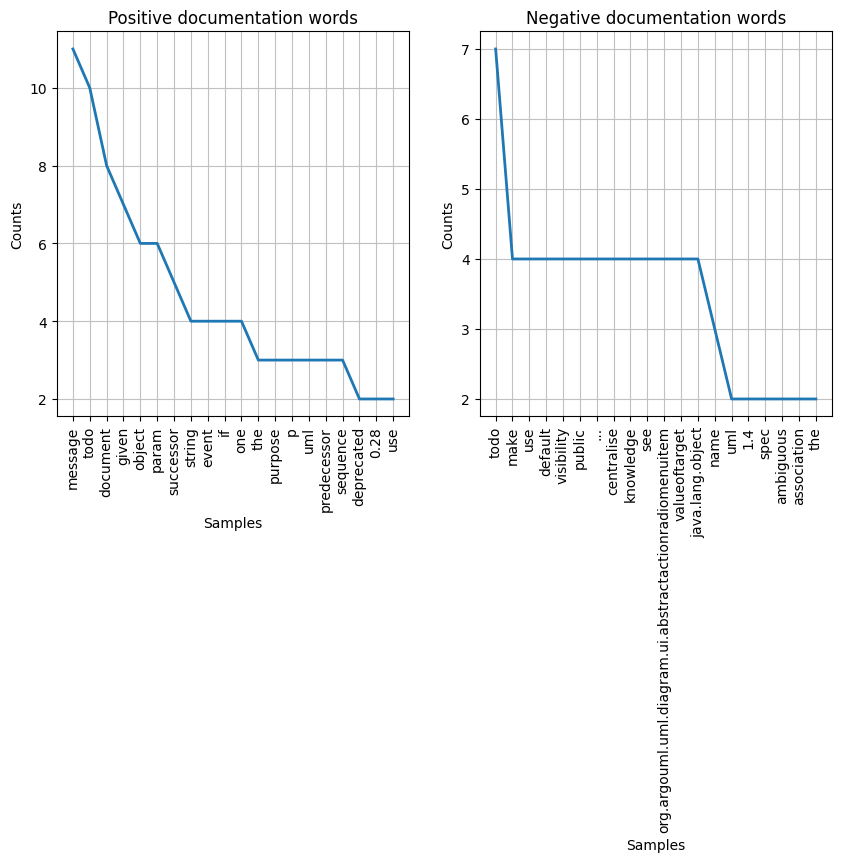

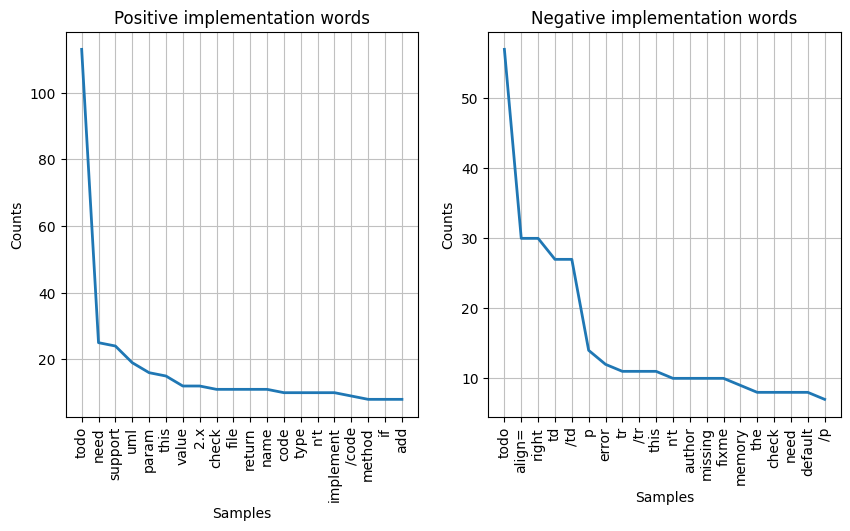

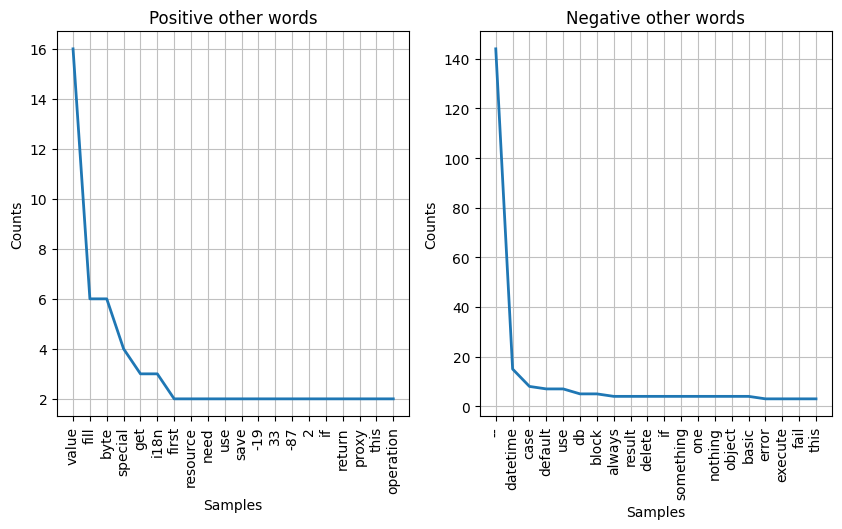

In [64]:
# Unclear titles? Not positive/negative words but words from positive/negative comments

plt.subplot(1, 2, 1)
defect_fd_positive = FreqDist(positive_defect_words)
defect_fd_positive.plot(20, title="Positive defect words", show=False)
plt.subplot(1, 2, 2)
defect_fd_negative = FreqDist(negative_defect_words)
defect_fd_negative.plot(20, title="Negative defect words", show=False)
plt.show()

plt.subplot(1, 2, 1)
design_fd_positive = FreqDist(positive_design_words)
design_fd_positive.plot(20, title="Positive design words", show=False)
plt.subplot(1, 2, 2)
design_fd_negative = FreqDist(negative_design_words)
design_fd_negative.plot(20, title="Negative design words", show=False)
plt.show()

plt.subplot(1, 2, 1)
test_fd_positive = FreqDist(positive_test_words)
test_fd_positive.plot(20, title="Positive test words", show=False)
plt.subplot(1, 2, 2)
test_fd_negative = FreqDist(negative_test_words)
test_fd_negative.plot(20, title="Negative test words", show=False)
plt.show()

plt.subplot(1, 2, 1)
documentation_fd_positive = FreqDist(positive_documentation_words)
documentation_fd_positive.plot(20, title="Positive documentation words", show=False)
plt.subplot(1, 2, 2)
documentation_fd_negative = FreqDist(negative_documentation_words)
documentation_fd_negative.plot(20, title="Negative documentation words", show=False)
plt.show()

plt.subplot(1, 2, 1)
implementation_fd_positive = FreqDist(positive_implementation_words)
implementation_fd_positive.plot(20, title="Positive implementation words", show=False)
plt.subplot(1, 2, 2)
implementation_fd_negative = FreqDist(negative_implementation_words)
implementation_fd_negative.plot(20, title="Negative implementation words", show=False)
plt.show()

plt.subplot(1, 2, 1)
other_fd_positive = FreqDist(positive_other_words)
other_fd_positive.plot(20, title="Positive other words", show=False)
plt.subplot(1, 2, 2)
other_fd_negative = FreqDist(negative_other_words)
other_fd_negative.plot(20, title="Negative other words", show=False)
plt.show()

*8. We would like to test the various transitions generated by the sentiment analysis. More specifically, we count the
number of cases where an overall positive sentiment is followed by a positive sentiment for the next followed
comment. Summarize in a table, for each category, the number (or proportion) of cases of (Pos→Pos, Pos→Neg,
Neg → Neg, Neg → Neu, Neu→Neu, Pos→Neu, Neu→Neg, Neu→Pos). For neutral (Neu), you should consider
some threshold so that the overall sentiment score is between [-ε +ε] where ε is chosen close to zero (e.g., 0.1,
0.2). Similarly, comment whether the transition distribution is relevant to discriminate among the various
categories.*

In [70]:
# 0 Pos → Pos, 1 Pos → Neg, 2 Neg → Neg, 3 Neg → Neu, 4 Neu → Neu, 5 Pos → Neu, 6 Neu → Neg, 7 Neu → Pos
defect_transitions = [0, 0, 0, 0, 0, 0, 0, 0]

for n, comment in enumerate(sentiment_defect):
    if n == 0:
        sentiment_prev = comment[3]
    else:
        sentiment_this = comment[3]
        if sentiment_this > 1:
            if sentiment_prev > 1: defect_transitions[0] += 1 # Positive to positive
            elif sentiment_prev > -1: defect_transitions[1] += 1 # Positive to negative
            else: defect_transitions[5] += 1  # Positive to neutral
        elif sentiment_this < -1:
            if sentiment_prev > -1: defect_transitions[2] += 1 # Negative to negative
            else: defect_transitions[3] += 1  # Negative to neutral
        else:
            if sentiment_prev > 1: defect_transitions[7] += 1 # Neutral to positive
            elif sentiment_prev > -1: defect_transitions[6] += 1 # Neutral to negative
            else: defect_transitions[4] += 1  # Neutral to neutral
    sentiment_prev = comment[3]


In [71]:
print(defect_transitions)

[0, 6, 25, 7, 93, 2, 330, 8]


In [76]:
def sentiment_transitions(sentiment_list, transitions_list):
    for n, comment in enumerate(sentiment_list):
        if n == 0:
            sentiment_prev = comment[3]
        else:
            sentiment_this = comment[3]
            if sentiment_this > 1:
                if sentiment_prev > 1: transitions_list[0] += 1 # Positive to positive
                elif sentiment_prev > -1: transitions_list[1] += 1 # Positive to negative
                else: transitions_list[5] += 1  # Positive to neutral
            elif sentiment_this < -1:
                if sentiment_prev > -1: transitions_list[2] += 1 # Negative to negative
                else: transitions_list[3] += 1  # Negative to neutral
            else:
                if sentiment_prev > 1: transitions_list[7] += 1 # Neutral to positive
                elif sentiment_prev > -1: transitions_list[6] += 1 # Neutral to negative
                else: transitions_list[4] += 1  # Neutral to neutral
        sentiment_prev = comment[3]

# 0 Pos → Pos, 1 Pos → Neg, 2 Neg → Neg, 3 Neg → Neu, 4 Neu → Neu, 5 Pos → Neu, 6 Neu → Neg, 7 Neu → Pos
defect_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
design_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
test_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
documentation_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
implementation_transitions = [0, 0, 0, 0, 0, 0, 0, 0]
other_transitions = [0, 0, 0, 0, 0, 0, 0, 0]

sentiment_transitions(sentiment_defect, defect_transitions)
sentiment_transitions(sentiment_design, design_transitions)
sentiment_transitions(sentiment_test, test_transitions)
sentiment_transitions(sentiment_documentation, documentation_transitions)
sentiment_transitions(sentiment_implementation, implementation_transitions)
sentiment_transitions(sentiment_other, other_transitions)

In [78]:
print(defect_transitions)
print(design_transitions)
print(test_transitions)
print(documentation_transitions)
print(implementation_transitions)
print(other_transitions)

[0, 6, 25, 7, 93, 2, 330, 8]
[1, 15, 21, 9, 116, 4, 356, 18]
[0, 1, 3, 1, 11, 0, 67, 1]
[0, 2, 1, 0, 7, 1, 39, 3]
[0, 8, 10, 1, 71, 1, 656, 9]
[0, 1, 6, 0, 47, 0, 527, 1]
